In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import os
os.getcwd()

'/content/drive/My Drive/Cloud-Computing-VNE-main'

In [122]:
os.chdir('/content/drive/My Drive/Cloud-Computing-VNE-main/')
os.getcwd()

'/content/drive/My Drive/Cloud-Computing-VNE-main'

In [123]:
!unzip alib

Archive:  alib.zip
replace alib/cli.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace alib/cli.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: alib/cli.py             
replace alib/cli.py.bak? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [124]:
!pip install gurobipy
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
# # Graph Extraction

import os
import pickle
import sys
import graph
from vne import create_vne


class Extract:
    def get_graphs(self):
        os.chdir('/content/drive/My Drive/Cloud-Computing-VNE-main/')
        current = os.getcwd()
        print(current)
        current = os.path.join(
            os.path.dirname(current),
            "Cloud-Computing-VNE-main",
            "P3_ALIB_MASTER",
            "input",
            "senario_RedBestel.pickle",
        )
        with open(current, "rb") as f:
            data = pickle.load(f)
        para = graph.Parameters(10000, 500000, 10000, 500000, 0, 100, 0, 100, 1,
                                1) 
        substrate = graph.Graph(
            len(data.scenario_list[0].substrate.nodes),
            data.scenario_list[0].substrate.edges,
            para,
        )
        min_nodes=3
        max_nodes=5
        no_requests=2
        vne_list = create_vne(min_nodes, max_nodes, no_requests)
        return substrate, vne_list


In [126]:
x = Extract()
# substrate, vne_list = x.get_graphs(req_no = 15)    # USE THIS STATEMENT FOR AUTOMATION & comment line no 42
substrate, vne_list = x.get_graphs()
output = {"substrate": substrate, "vne_list": vne_list}
pickle_file = open("input.pickle", "wb")
pickle.dump(output, pickle_file)

/content/drive/My Drive/Cloud-Computing-VNE-main


In [127]:
print("Substrate Network")
# print("Nodes: ", substrate.nodes)
print("Nodes & their Weights: ", substrate.node_weights)
# print("Edges: ", substrate.edges)
print("Edge & their Weights: ", substrate.edge_weights)
print("Adj List: ", substrate.neighbours)

Substrate Network
Nodes & their Weights:  {0: 434401, 1: 355809, 2: 24692, 3: 74468, 4: 481274, 5: 248196, 6: 384915, 7: 358668, 8: 366107, 9: 258570, 10: 386659, 11: 234352, 12: 345433, 13: 249492, 14: 279902, 15: 109261, 16: 13453, 17: 238889, 18: 419241, 19: 449573, 20: 287950, 21: 397765, 22: 71622, 23: 313119, 24: 95038, 25: 487361, 26: 159141, 27: 66128, 28: 434979, 29: 410827, 30: 429833, 31: 262917, 32: 171633, 33: 322735, 34: 21544, 35: 331308, 36: 220491, 37: 217867, 38: 159380, 39: 383284, 40: 421387, 41: 419813, 42: 428073, 43: 238672, 44: 454012, 45: 209582, 46: 13884, 47: 473735, 48: 301796, 49: 56061, 50: 228269, 51: 494290, 52: 421390, 53: 349837, 54: 331956, 55: 198303, 56: 224488, 57: 160054, 58: 302079, 59: 262440, 60: 441443, 61: 216151, 62: 248152, 63: 136285, 64: 313540, 65: 330866, 66: 95684, 67: 285536, 68: 111429, 69: 411125, 70: 249465, 71: 486540, 72: 92295, 73: 474407, 74: 303053, 75: 287298, 76: 277208, 77: 496630, 78: 354281, 79: 98762, 80: 417715, 81: 352

In [128]:
# import graph

# Demo_Substrate Graph
nodes = 8
para = graph.Parameters(10, 50, 10, 30, 0, 100, 0, 100, 1, 1)
# edges = [('0', '1'), ('1', '0'), ('0', '4'), ('4', '0'), ('1', '2'), ('2', '1'),
        #  ('4', '1'), ('1', '4'), ('2', '3'), ('3', '2'), ('3', '4'), ('4', '3')]
edges = []
for i in range(nodes):
  for j in range(nodes):
    if i != j:
      edges.append((str(i), str(j)))
demo_substrate = graph.Graph(nodes, edges, para)

In [129]:
print("demo_substrate Network")
# print("Nodes: ", demo_substrate.nodes)
print("Nodes & their Weights: ", demo_substrate.node_weights)
# print("Edges: ", demo_substrate.edges)
print("Edge & their Weights: ", demo_substrate.edge_weights)
print("Adj List: ", demo_substrate.neighbours)

demo_substrate Network
Nodes & their Weights:  {0: 14, 1: 24, 2: 19, 3: 24, 4: 16, 5: 11, 6: 15, 7: 25}
Edge & their Weights:  {('0', '1'): 40, ('1', '0'): 40, ('0', '2'): 47, ('2', '0'): 47, ('0', '3'): 24, ('3', '0'): 24, ('0', '4'): 50, ('4', '0'): 50, ('0', '5'): 26, ('5', '0'): 26, ('0', '6'): 28, ('6', '0'): 28, ('0', '7'): 46, ('7', '0'): 46, ('1', '2'): 19, ('2', '1'): 19, ('1', '3'): 19, ('3', '1'): 19, ('1', '4'): 42, ('4', '1'): 42, ('1', '5'): 40, ('5', '1'): 40, ('1', '6'): 28, ('6', '1'): 28, ('1', '7'): 31, ('7', '1'): 31, ('2', '3'): 12, ('3', '2'): 12, ('2', '4'): 47, ('4', '2'): 47, ('2', '5'): 42, ('5', '2'): 42, ('2', '6'): 26, ('6', '2'): 26, ('2', '7'): 33, ('7', '2'): 33, ('3', '4'): 25, ('4', '3'): 25, ('3', '5'): 11, ('5', '3'): 11, ('3', '6'): 13, ('6', '3'): 13, ('3', '7'): 28, ('7', '3'): 28, ('4', '5'): 34, ('5', '4'): 34, ('4', '6'): 35, ('6', '4'): 35, ('4', '7'): 25, ('7', '4'): 25, ('5', '6'): 17, ('6', '5'): 17, ('5', '7'): 43, ('7', '5'): 43, ('6', '7

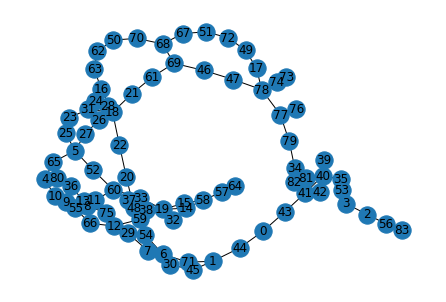

In [130]:
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

G_sub = nx.Graph()

for u,v in substrate.edges:
  G_sub.add_edge(u, v)

nx.draw(G_sub, with_labels = True)
plt.savefig("substrate.png")

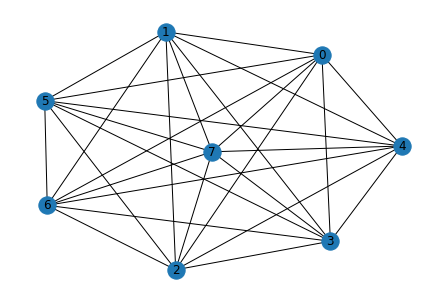

In [131]:
G_demo_sub = nx.Graph()

for u,v in demo_substrate.edges:
  G_demo_sub.add_edge(u, v)

nx.draw(G_demo_sub, with_labels = True)
plt.savefig("demo_substrate.png")

In [132]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  print("Request ", i+1)
  print("--------------------------------------------------------------")
  print("VNE Request")
  print("Nodes & their Weights: ", vne.node_weights)
  print("Edge & their Weights: ", vne.edge_weights)
  print("Adj List: ", vne.neighbours)
  print()
  

Request  1
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 10, 1: 15, 2: 12, 3: 15, 4: 12}
Edge & their Weights:  {('4', '0'): 7, ('0', '4'): 7, ('2', '0'): 1, ('0', '2'): 1, ('0', '3'): 2, ('3', '0'): 2, ('0', '1'): 3, ('1', '0'): 3}
Adj List:  {0: {'4', '1', '2', '3'}, 1: {'0'}, 2: {'0'}, 3: {'0'}, 4: {'0'}}

Request  2
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 10, 1: 13, 2: 10}
Edge & their Weights:  {('0', '2'): 1, ('2', '0'): 1, ('1', '2'): 10, ('2', '1'): 10}
Adj List:  {0: {'2'}, 1: {'2'}, 2: {'1', '0'}}



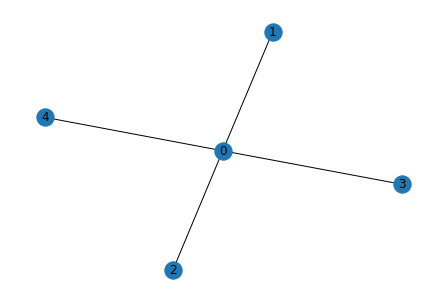

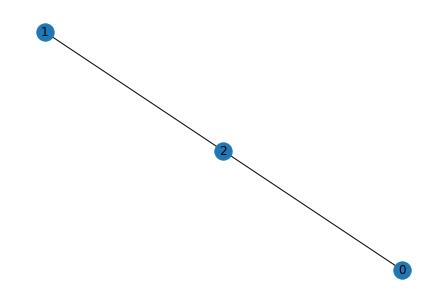

In [133]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  G_vne = nx.Graph()

  for u,v in vne.edges:
    G_vne.add_edge(u, v)
  plt.figure(i+1)
  nx.draw(G_vne, with_labels = True)
  plt.savefig("vne_"+str(i+1)+".png")
  # plt.clf()

In [134]:
import sys


ratio_v_s = [[0, 0]]*demo_substrate.nodes

def fun(s_nd, s_nd_cap, vne):
  count = 0
  temp_cap = s_nd_cap
  for v,c in vne.node_weights.items():
    if c < temp_cap:
      count += 1
      temp_cap -= c;
  #return count
  return temp_cap

def update_ratio_v_s(vne, curr_state_sg, v_nd_id, v_nd_cap):
  global ratio_v_s
  for s_nd, s_nd_cap in curr_state_sg.node_weights.items():
    numer = v_nd_cap
    temp = fun(s_nd, s_nd_cap, vne)
    if temp == s_nd_cap:
      tri = sys.maxsize
    else:
      denomer = s_nd_cap - temp
      tri = numer/denomer
    # print(s_nd)
    ratio_v_s[s_nd] = [tri, s_nd]

  ratio_v_s = sorted(ratio_v_s)
    


In [135]:
VNEmbed_nodes = [-1]*len(vne_list)
VNEmbed_edges = [-1]*len(vne_list)

In [136]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  # print("Nodes: ", vne.nodes)
  mappingVtoS = {}
  mappingStoV = {}
  # print("Nodes: ", demo_substrate.nodes)
  curr_state_sg = demo_substrate


  # Node Mapping
  flag = False
  temp = sorted(vne.node_weights.items(), key = lambda kv:(kv[1]), reverse=True)
  for nd_id, nd_cap in temp:
    update_ratio_v_s(vne, curr_state_sg, nd_id, nd_cap)
    for s_nd_from_tri in ratio_v_s:
      # print(ratio_v_s)
      # print(s_nd_from_tri[1], curr_state_sg.node_weights[s_nd_from_tri[1]])
      s_nd_cap = curr_state_sg.node_weights[s_nd_from_tri[1]]
      if nd_cap <= s_nd_cap and mappingStoV.get(s_nd_from_tri[1]) == None:
        mappingVtoS[str(nd_id)] = str(s_nd_from_tri[1])
        mappingStoV[str(s_nd_from_tri[1])] = str(nd_id)
        curr_state_sg.node_weights[s_nd_from_tri[1]] -= nd_cap
        break 
  
    if mappingVtoS.get(str(nd_id)) == None:
      flag = True
      print("Unable to embed all nodes for VNRequest_", i+1, " VNRequest Discarded")
      break
  if flag:
    continue

  if len(mappingVtoS) == vne.nodes:
    print("Node Mapping for VNRequest_", i+1, " is completed, Waiting for Link Mapping")
    # print(mappingVtoS)
    # print(mappingStoV)
  else:
    print("Unable to embed all nodes for VNRequest_", i+1, " VNRequest Discarded")
    continue

  print(mappingVtoS)
  # Link Mapping
  link_map_VtoS = {}
  for u,v in vne.edges:
    mapped_s_nd_u = mappingVtoS[u]
    mapped_s_nd_v = mappingVtoS[v]
    demand_uv = vne.edge_weights[(u, v)]

    all_path_uv = curr_state_sg.printAllPaths(mapped_s_nd_u, mapped_s_nd_v, demand_uv)
    all_path_uv.sort(key = len)
    if len(all_path_uv) == 0:
      print("Unable to embed all Links for VNRequest_", i+1, " VNRequest Discarded")
      break
    else:
      link_map_VtoS[(u, v)] = all_path_uv[0]
      for ix in range(len(all_path_uv[0])-1):
        ux = all_path_uv[0][ix]
        vx = all_path_uv[0][ix+1]
        curr_state_sg.edge_weights[(ux, vx)] = curr_state_sg.edge_weights[(ux, vx)] - demand_uv
    
  if len(link_map_VtoS) == len(vne.edges):
    demo_substrate = curr_state_sg
    print("Link Mapping for VNRequest_", i+1, " is completed")
    VNEmbed_nodes[i] = mappingVtoS
    VNEmbed_edges[i] = link_map_VtoS
    # print(link_map_VtoS)
  else:
    print("Unable to embed all links for VNRequest_", i+1, " VNRequest Discarded")
  print("---------------------------------------------------------------------\n")

  


Node Mapping for VNRequest_ 1  is completed, Waiting for Link Mapping
{'1': '1', '3': '3', '2': '7', '4': '0', '0': '2'}
Link Mapping for VNRequest_ 1  is completed
---------------------------------------------------------------------

Node Mapping for VNRequest_ 2  is completed, Waiting for Link Mapping
{'1': '4', '0': '5', '2': '6'}
Link Mapping for VNRequest_ 2  is completed
---------------------------------------------------------------------



In [137]:
for i in range(len(VNEmbed_nodes)):
  node_map = VNEmbed_nodes[i]
  edge_map = VNEmbed_edges[i]
  print("VNReques_", i+1)
  print(node_map)
  print(edge_map)
  print("----------------------------------------------\n")

VNReques_ 1
{'1': '1', '3': '3', '2': '7', '4': '0', '0': '2'}
{('4', '0'): ['0', '2'], ('2', '0'): ['7', '2'], ('0', '2'): ['2', '7'], ('0', '3'): ['2', '3'], ('3', '0'): ['3', '2'], ('0', '4'): ['2', '0'], ('0', '1'): ['2', '1'], ('1', '0'): ['1', '2']}
----------------------------------------------

VNReques_ 2
{'1': '4', '0': '5', '2': '6'}
{('0', '2'): ['5', '6'], ('1', '2'): ['4', '6'], ('2', '1'): ['6', '4'], ('2', '0'): ['6', '5']}
----------------------------------------------

